<a href="https://colab.research.google.com/github/KusumaatmaSyafadhi/kusumaatmas/blob/main/0064_Data_Jumlah_Pengunjung_Mancanegara_Ke_Tempat_Wisata_Di_Jakarta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading Datasets**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler  #Feature Scaling
from sklearn.model_selection import train_test_split #Data Partition

#MODELLING
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
pengunjung=pd.read_csv("data-jumlah-kunjungan-wisatawan-mancanegara-ke-destinasi-wisata-di-provinsi-dki-jakarta-bulan-januari-tahun-2020.csv")

**Data Preprocessing**

In [4]:
pengunjung.shape

(20, 4)

In [5]:
pengunjung.head(10)

,tahun,bulan,destinasi_wisata,jumlah
0,2020,1,Taman Impian Jaya Ancol,516
1,2020,1,Taman Mini Indonesia Indah,0
2,2020,1,Taman Margasatwa Ragunan,449
3,2020,1,Monumen Nasional,2070
4,2020,1,Museum Nasional,2877
5,2020,1,Museum Satria Mandala,0
6,2020,1,Museum Sejarah Jakarta,1831
7,2020,1,Museum Tekstil,312
8,2020,1,Museum Bahari,274
9,2020,1,Museum Seni Rupa dan Keramik,300


In [6]:
pengunjung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tahun             20 non-null     int64 
 1   bulan             20 non-null     int64 
 2   destinasi_wisata  20 non-null     object
 3   jumlah            20 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 768.0+ bytes


In [7]:
pengunjung.describe()

,tahun,bulan,jumlah
count,20.0,20.0,20.000000
mean,2020.0,1.0,851.150000
std,0.0,0.0,1466.389776
min,2020.0,1.0,0.000000
25%,2020.0,1.0,0.750000
50%,2020.0,1.0,287.000000
75%,2020.0,1.0,986.750000
max,2020.0,1.0,6009.000000


In [8]:
pengunjung=pengunjung.drop_duplicates()

In [9]:
pengunjung.shape

(20, 4)

In [10]:
pengunjung.dtypes

tahun                int64
bulan                int64
destinasi_wisata    object
jumlah               int64
dtype: object

In [11]:
pengunjung['jumlah']=pengunjung['jumlah'].replace(" ",np.nan)

In [12]:
pengunjung['jumlah']=pengunjung['jumlah'].astype("float64")

In [13]:
pengunjung.dtypes

tahun                 int64
bulan                 int64
destinasi_wisata     object
jumlah              float64
dtype: object

In [14]:
pengunjung.isnull().sum()

tahun               0
bulan               0
destinasi_wisata    0
jumlah              0
dtype: int64

<function matplotlib.pyplot.show>

<Figure size 720x360 with 0 Axes>

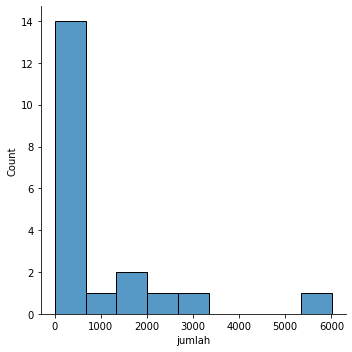

In [15]:
plt.figure(figsize=(10,5))
sns.displot(pengunjung["jumlah"])
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

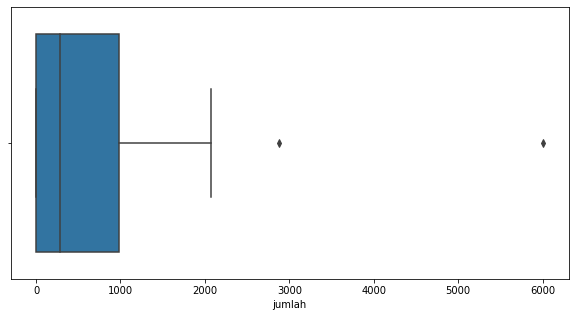

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(pengunjung["jumlah"])
plt.show

In [17]:
fill=pengunjung['jumlah'].mean
pengunjung['jumlah']=pengunjung['jumlah'].fillna(fill)  #MENGISI NILAI KOSONG DENGAN MEAN. SAYA MASIH BELUM PAHAM DENGAN TAHAPAN INI

In [18]:
pengunjung.isnull().sum()

tahun               0
bulan               0
destinasi_wisata    0
jumlah              0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

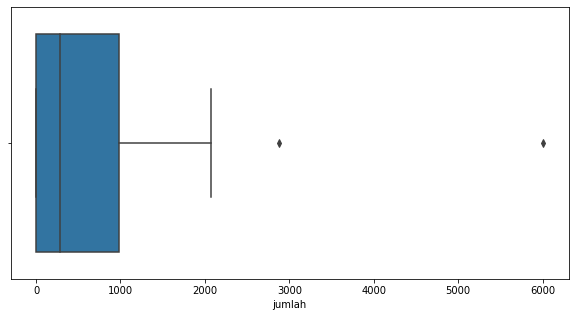

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(pengunjung["jumlah"])
plt.show  #DAN EFEKNYA KESINI

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

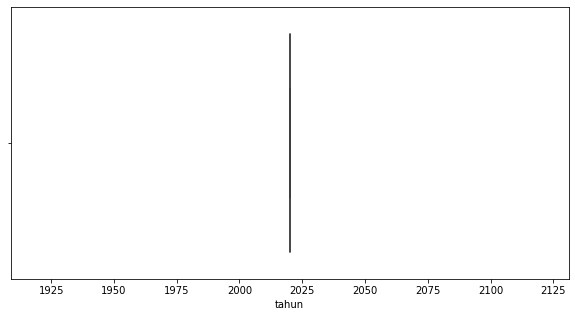

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(pengunjung["tahun"])
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

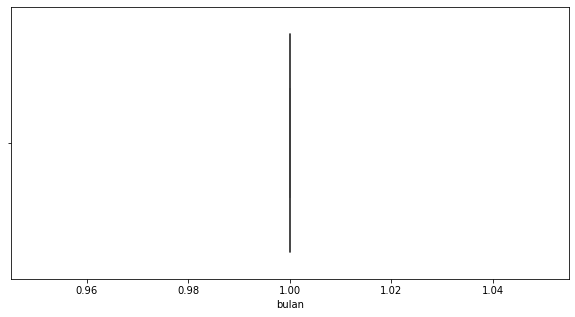

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(pengunjung["bulan"])
plt.show

Membuat Fungsi Outlier Detection

In [22]:
def outlier(sample):
  Q1=sample.quantile(0.25)
  Q3=sample.quantile(0.75)

  IQR=Q3-Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  number_outlier=len(sample[sample>upper_range])+len(sample[sample<lower_range])
  print("Number Of Outlier {}".format(number_outlier))

  if number_outlier>0:
    print("Outlier observation row: ")
  else:
    pass
  for i in range(len(sample)):
    if sample[i]<lower_range:
      print[i]
    elif sample[i]>upper_range:
      print(i)
    else:
      pass        


In [23]:
outlier(pengunjung['jumlah'])

Number Of Outlier 2
Outlier observation row: 
4
19


In [24]:
pengunjung.loc[[4,19],"jumlah"]

4     2877.0
19    6009.0
Name: jumlah, dtype: float64

In [25]:
outlier(pengunjung['tahun'])

Number Of Outlier 0


In [26]:
outlier(pengunjung['bulan'])

Number Of Outlier 0


DATA PARTITION

In [29]:
pengunjung=pengunjung.drop(labels="bulan",axis=1)

In [43]:
train,test = train_test_split(pengunjung,test_size = 0.20 , random_state = 111)

train_X = train.drop(labels='destinasi_wisata',axis=1)
train_Y = train['destinasi_wisata']
test_X = test.drop(labels='destinasi_wisata',axis = 1)
test_Y = test['destinasi_wisata']


SMOTE

In [44]:
from imblearn.over_sampling import SMOTE

os = SMOTE(sampling_strategy='minority',random_state= 123, k_neighbors =5)
train_smote_X, train_smote_Y = os.fit_resample(train_X,train_Y)
train_smote_X = pd.DataFrame(data = train_smote_X,columns=train_X.columns)
train_smote_Y = pd.DataFrame(data = train_smote_Y)

In [45]:
train_Y.value_counts()

Museum Sejarah Jakarta          1
Taman Margasatwa Ragunan        1
Taman Impian Jaya Ancol         1
Taman Mini Indonesia Indah      1
Rumah si Pitung                 1
Museum Nasional                 1
PBB Setu babakan                1
Museum Prasasti                 1
Museum Bahari                   1
Kawasan Kota Tua                1
Museum Seni Rupa dan Keramik    1
Taman Arkeologi Onrust          1
Kepulauan Seribu                1
Planetarium                     1
Museum Tekstil                  1
Museum Wayang                   1
Name: destinasi_wisata, dtype: int64

KNN



In [46]:
ss=StandardScaler()
train_smote_X[num_cols]=ss.fit_transform(train_smote_X[num_cols])
test_X[num_cols]=ss.transform(test_X[num_cols])

NameError: ignored

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knnc=KNeighborsClassifier()
param_grid = {
    'n_neighbors' : [2,3,4,5,6],
    'metric' : ['euclidean','manhattan']
}

In [ ]:
from sklearn.model_selection import GridSearchCV
CV_kncc = GridSearchCV(estimator=kncc)